In [1]:
import os
main_dir = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir(main_dir)

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

## Parameters

In [ ]:
series = ["Baseline", "Early AJEST", "AJEST", "Random"]
plt_kwargs = dict(color = ["C0", "C3", "C4", "C1"],
                  alpha = [0.5, 0.8, 0.7, 0.6],
                  linewidth = [4, 1, 0.5, 0.5],
                  zorder=[1000,10000,100,10])
plt_kwargs_zoom = dict(color = ["C0", "C3", "C4", "C1"],
                       alpha = [0.6, 0.8, 0.7, 0.6],
                       linewidth = [3, 1, 1, 1],
                       zorder=[1000,10000,100,10])
plt_kwargs = {s:{k:v[i] for k,v in plt_kwargs.items()} for i,s in enumerate(series)}
plt_kwargs_zoom = {s:{k:v[i] for k,v in plt_kwargs_zoom.items()} for i,s in enumerate(series)}

In [ ]:
metrics = ["fid", "fd", "top1", "top5"]
metrics_names = {"fid":"FID", "fd":"FD-DINOv2", "top1":"Swin-L Top-1 Accuracy", "top5":"Swin-L Top-5 Accuracy"}

In [ ]:
dir_results = os.path.join(dirs.RESULTS_HOME, "Images", "04_Main_Results")

In [ ]:
results_val = {}
for k in metrics: results_val[k] = {}

# W&B Training Plots' Data

## Parameters

In [109]:
dir_results = os.path.join(dirs.RESULTS_HOME, "Images", "04_Main_Results")

In [110]:
series = ["Baseline", "Early AJEST", "AJEST", "Random"]
plt_kwargs = dict(color = ["C0", "C3", "C4", "C1"],
                  alpha = [0.5, 0.8, 0.7, 0.6],
                  linewidth = [4, 1, 0.5, 0.5],
                  zorder=[1000,10000,100,10])
plt_kwargs_zoom = dict(color = ["C0", "C3", "C4", "C1"],
                       alpha = [0.6, 0.8, 0.7, 0.6],
                       linewidth = [3, 1, 1, 1],
                       zorder=[1000,10000,100,10])
plt_kwargs = {s:{k:v[i] for k,v in plt_kwargs.items()} for i,s in enumerate(series)}
plt_kwargs_zoom = {s:{k:v[i] for k,v in plt_kwargs_zoom.items()} for i,s in enumerate(series)}

In [111]:
results = {}

## Time

### Load data into Pandas

In [112]:
pandas_data = pd.read_csv(os.path.join(dir_results, "Main_Results_Loss_vs_Time.csv"))

In [113]:
pandas_data

,Training Time [sec],Training time [hs],Group: 06_CorrectEMA_AJEST_00 - Loss,Group: 06_CorrectEMA_Early_AJEST_00 - Loss,Group: 06_CorrectEMA_Random_00 - Loss,Group: 04_Tiny_LR_Baseline_04 - Loss,Group: 04_Tiny_LR_Ref_00 - Loss
0,1.055769e+04,0.002933,NaN,NaN,20.138007,NaN,NaN
1,1.129142e+04,0.003137,NaN,NaN,NaN,NaN,15.073979
2,1.143390e+04,0.003176,NaN,NaN,NaN,NaN,15.128112
3,1.543995e+04,0.004289,38.754126,NaN,NaN,NaN,NaN
4,1.671881e+04,0.004644,NaN,NaN,NaN,NaN,14.986211
...,...,...,...,...,...,...,...
65467,1.727988e+08,47.999678,NaN,-9.626287,NaN,NaN,NaN
65468,1.728010e+08,48.000283,NaN,NaN,NaN,-10.320302,NaN
65469,1.728093e+08,48.002574,NaN,NaN,-8.109115,NaN,NaN
65470,1.728143e+08,48.003983,NaN,-10.160560,NaN,NaN,NaN


### Preprocess with Pandas

In [114]:
pandas_data = pandas_data.rename(columns={"Group: 06_CorrectEMA_AJEST_00 - Loss":"AJEST",
                                          "Group: 06_CorrectEMA_Early_AJEST_00 - Loss":"Early AJEST",
                                          "Group: 06_CorrectEMA_Random_00 - Loss":"Random",
                                          "Group: 04_Tiny_LR_Baseline_04 - Loss":"Baseline",
                                          "Group: 04_Tiny_LR_Ref_00 - Loss":"Reference"})

### Get data in Numpy

In [115]:
results["time"] = {}
for s in series:
    results["time"][s] = {}
    results["time"][s]["time"], results["time"][s]["loss"] = pandas_data[["Training time [hs]",s]][pd.notna(pandas_data[s])].to_numpy().T

### Plot

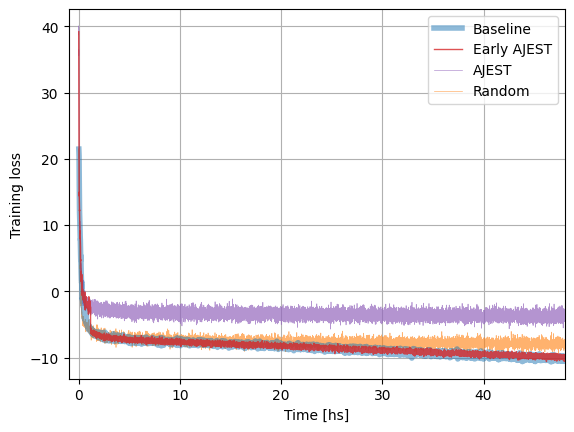

In [116]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["time"][s]["time"], results["time"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Time [hs]")
plt.ylabel("Training loss")
plt.xlim([-1, 48])
plt.grid()

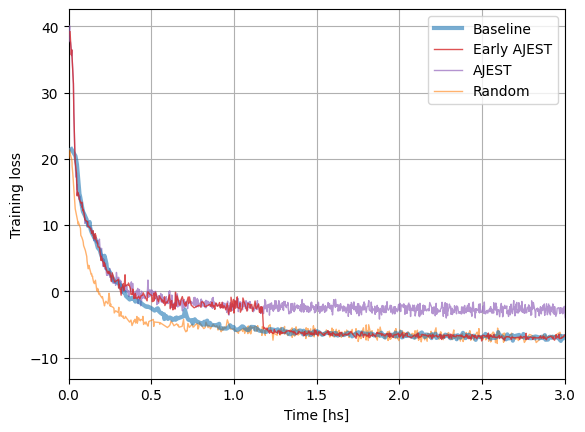

In [117]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["time"][s]["time"], results["time"][s]["loss"], label=s, **plt_kwargs_zoom[s])
plt.legend()
plt.xlabel("Time [hs]")
plt.ylabel("Training loss")
# plt.xlim([-1, 48])
plt.xlim([0, 3])
plt.grid()

## Epoch

### Load data into Pandas

In [118]:
pandas_data = pd.read_csv(os.path.join(dir_results, "Main_Results_Loss_vs_Epoch.csv"))

In [119]:
pandas_data

,Epoch,Group: 06_CorrectEMA_AJEST_00 - _step,Group: 06_CorrectEMA_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_AJEST_00 - _step__MAX,Group: 06_CorrectEMA_AJEST_00 - Loss,Group: 06_CorrectEMA_AJEST_00 - Loss__MIN,Group: 06_CorrectEMA_AJEST_00 - Loss__MAX,Group: 06_CorrectEMA_Early_AJEST_00 - _step,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MAX,...,Group: 04_Tiny_LR_Baseline_04 - _step__MAX,Group: 04_Tiny_LR_Baseline_04 - Loss,Group: 04_Tiny_LR_Baseline_04 - Loss__MIN,Group: 04_Tiny_LR_Baseline_04 - Loss__MAX,Group: 04_Tiny_LR_Ref_00 - _step,Group: 04_Tiny_LR_Ref_00 - _step__MIN,Group: 04_Tiny_LR_Ref_00 - _step__MAX,Group: 04_Tiny_LR_Ref_00 - Loss,Group: 04_Tiny_LR_Ref_00 - Loss__MIN,Group: 04_Tiny_LR_Ref_00 - Loss__MAX
0,0,8.0,8.0,8.0,38.377435,38.000744,38.754126,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,14.962896,14.838368,15.087425
1,1,18.0,18.0,18.0,38.953883,37.824091,40.083675,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,27.0,27.0,27.0,...,27.0,21.979856,21.979856,21.979856,NaN,NaN,NaN,NaN,NaN,NaN
3,3,36.0,36.0,36.0,37.956989,37.645382,38.268596,NaN,NaN,NaN,...,36.0,21.414513,21.414513,21.414513,19.0,19.0,19.0,14.950516,14.914821,14.986211
4,4,45.0,45.0,45.0,36.624354,35.902883,37.345825,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44519,81805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743954.0,-14.074966,-14.074966,-14.074966,NaN,NaN,NaN,NaN,NaN,NaN
44520,81809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743790.0,-13.611989,-13.611989,-13.611989,NaN,NaN,NaN,NaN,NaN,NaN
44521,81810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743799.0,-13.942100,-13.942100,-13.942100,NaN,NaN,NaN,NaN,NaN,NaN
44522,81827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,744152.0,-13.696459,-13.696459,-13.696459,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocess with Pandas

In [120]:
for c in pandas_data.columns:
    condition = any([st in c for st in ["MIN", "MAX", "step"]])
    if condition: del pandas_data[c]

In [121]:
pandas_data = pandas_data.rename(columns={"Group: 06_CorrectEMA_AJEST_00 - Loss":"AJEST",
                                          "Group: 06_CorrectEMA_Early_AJEST_00 - Loss":"Early AJEST",
                                          "Group: 06_CorrectEMA_Random_00 - Loss":"Random",
                                          "Group: 04_Tiny_LR_Baseline_04 - Loss":"Baseline",
                                          "Group: 04_Tiny_LR_Ref_00 - Loss":"Reference"})

### Get data in Numpy

In [122]:
results["epoch"] = {}
for s in series:
    results["epoch"][s] = {}
    results["epoch"][s]["epoch"], results["epoch"][s]["loss"] = pandas_data[["Epoch",s]][pd.notna(pandas_data[s])].to_numpy().T

### Plot

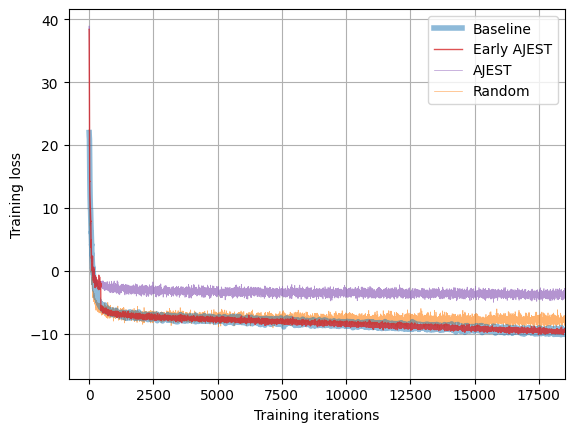

In [123]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Training iterations")
plt.ylabel("Training loss")
plt.xlim([-800, 18500])
plt.grid()

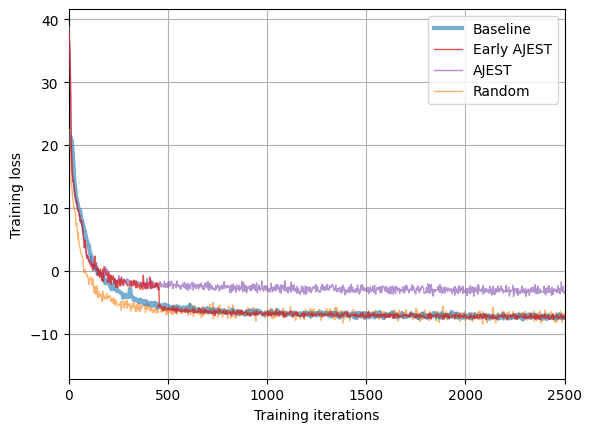

In [124]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs_zoom[s])
plt.legend()
plt.xlabel("Training iterations")
plt.ylabel("Training loss")
plt.xlim([0, 2500])
plt.grid()

## Images seen

### Load data into Pandas

In [125]:
pandas_data = pd.read_csv(os.path.join(dir_results, "Main_Results_Loss_vs_Seen_Images.csv"))

In [126]:
pandas_data

,Seen images [kimg],Group: 06_CorrectEMA_AJEST_00 - _step,Group: 06_CorrectEMA_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_AJEST_00 - _step__MAX,Group: 06_CorrectEMA_AJEST_00 - Loss,Group: 06_CorrectEMA_AJEST_00 - Loss__MIN,Group: 06_CorrectEMA_AJEST_00 - Loss__MAX,Group: 06_CorrectEMA_Early_AJEST_00 - _step,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MAX,...,Group: 04_Tiny_LR_Baseline_04 - _step__MAX,Group: 04_Tiny_LR_Baseline_04 - Loss,Group: 04_Tiny_LR_Baseline_04 - Loss__MIN,Group: 04_Tiny_LR_Baseline_04 - Loss__MAX,Group: 04_Tiny_LR_Ref_00 - _step,Group: 04_Tiny_LR_Ref_00 - _step__MIN,Group: 04_Tiny_LR_Ref_00 - _step__MAX,Group: 04_Tiny_LR_Ref_00 - Loss,Group: 04_Tiny_LR_Ref_00 - Loss__MIN,Group: 04_Tiny_LR_Ref_00 - Loss__MAX
0,0.384,8.0,8.0,8.0,38.000744,38.000744,38.000744,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.768,18.0,18.0,18.0,37.824091,37.824091,37.824091,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.536,36.0,36.0,36.0,37.956989,37.645382,38.268596,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.920,45.0,45.0,45.0,35.902883,35.902883,35.902883,45.0,45.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73392,167596.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743988.0,-13.560675,-13.560675,-13.560675,NaN,NaN,NaN,NaN,NaN,NaN
73393,167600.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,744006.0,-13.906603,-13.906603,-13.906603,NaN,NaN,NaN,NaN,NaN,NaN
73394,167604.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,744024.0,-13.662324,-13.662324,-13.662324,NaN,NaN,NaN,NaN,NaN,NaN
73395,167608.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,744242.0,-14.272428,-14.272428,-14.272428,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocess with Pandas

In [127]:
for c in pandas_data.columns:
    condition = any([st in c for st in ["MIN", "MAX", "step"]])
    if condition: del pandas_data[c]

In [128]:
pandas_data = pandas_data.rename(columns={"Group: 06_CorrectEMA_AJEST_00 - Loss":"AJEST",
                                          "Group: 06_CorrectEMA_Early_AJEST_00 - Loss":"Early AJEST",
                                          "Group: 06_CorrectEMA_Random_00 - Loss":"Random",
                                          "Group: 04_Tiny_LR_Baseline_04 - Loss":"Baseline",
                                          "Group: 04_Tiny_LR_Ref_00 - Loss":"Reference"})

### Get data in Numpy

In [129]:
results["nimg"] = {}
for s in series:
    results["nimg"][s] = {}
    results["nimg"][s]["nimg"], results["nimg"][s]["loss"] = pandas_data[["Seen images [kimg]",s]][pd.notna(pandas_data[s])].to_numpy().T

### Plot

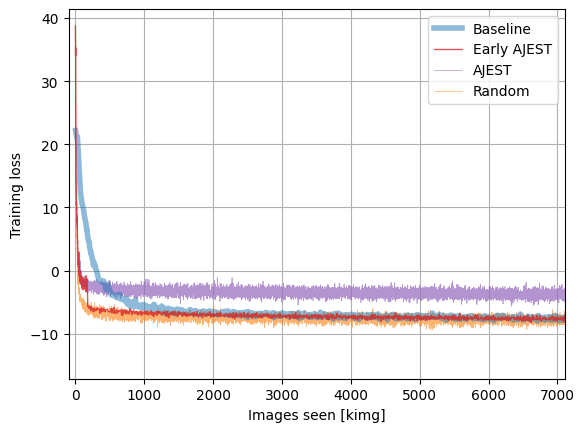

In [130]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 7104])
plt.grid()

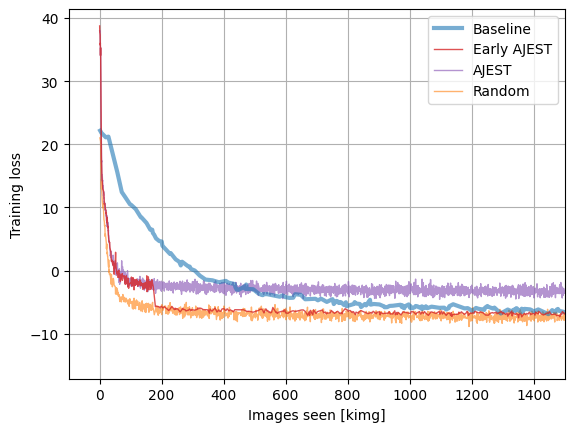

In [131]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs_zoom[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 1500])
plt.grid()

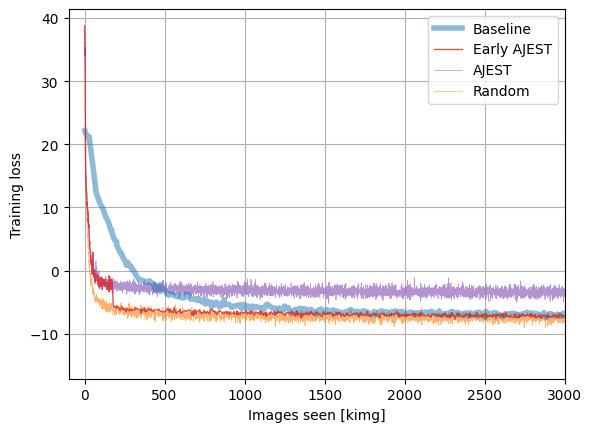

In [132]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 3000])
plt.grid()

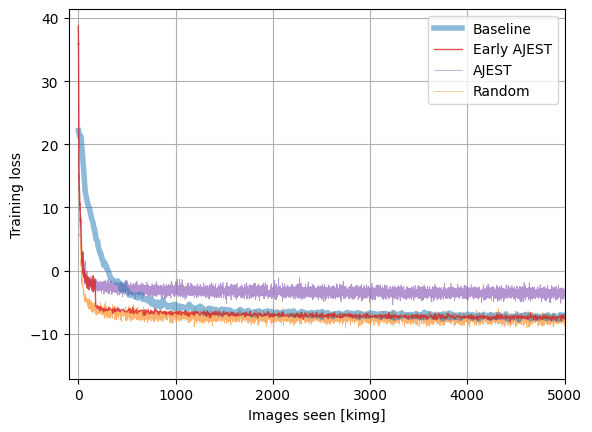

In [133]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 5000])
plt.grid()

## All of those

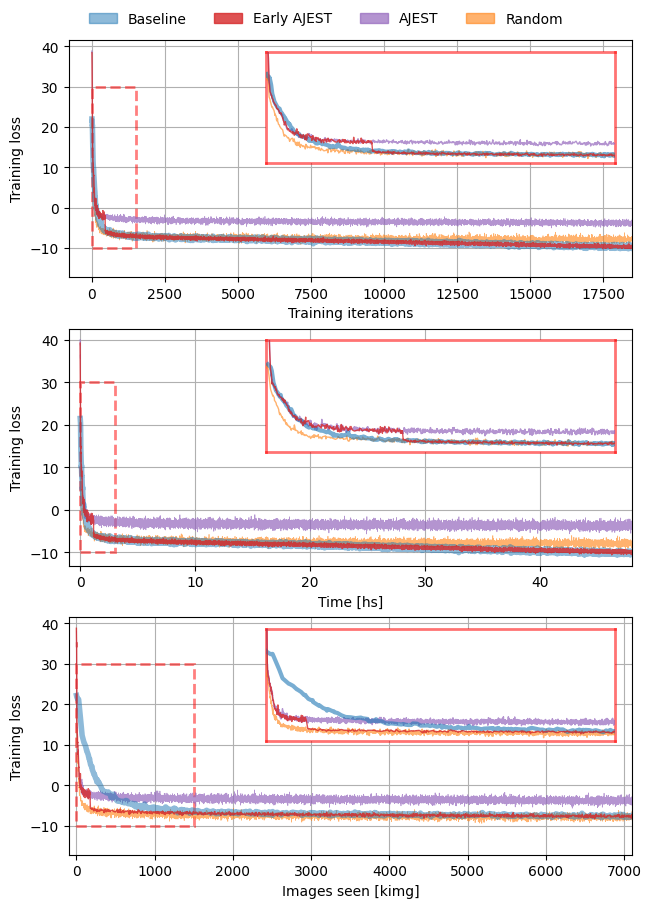

In [134]:
fig, axes = plt.subplots(nrows = 3, layout="constrained")
fig.set_size_inches([6.4, 9])
axes_in = []

# Epoch
ax = axes[0]
for s in series:
    ax.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], **plt_kwargs[s])
ax.set_xlabel("Training iterations")
ax.set_ylabel("Training loss")
ax.set_xlim([-800, 18500])
ax.grid()

# x1, x2, y1, y2 = [0, 2500, *ax.get_ylim()]  # subregion of the original image
x1, x2, y1, y2 = 0, 1500, -10, 30  # subregion of the original image
axin = ax.inset_axes([0.35, 0.48, 0.62, 0.47], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
legend_lines = []
for s in series:
    l, = axin.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs_zoom[s])
    legend_lines.append(l)
axin.set_xticks([]); axin.set_yticks([])
plt.setp(axin.spines.values(), color="red", linewidth=2, alpha=0.55)
axes_in.append(axin)
inset_indicator = ax.indicate_inset_zoom(axin, edgecolor="red", linewidth=2, zorder=5, linestyle="dashed")
for connector in inset_indicator.connectors: connector.set_visible(False)

# Time
ax = axes[1]
for s in series:
    ax.plot(results["time"][s]["time"], results["time"][s]["loss"], **plt_kwargs[s])
ax.set_xlabel("Time [hs]")
ax.set_ylabel("Training loss")
ax.set_xlim([-1, 48])
ax.grid()

# x1, x2, y1, y2 = [0, 2500, *ax.get_ylim()]  # subregion of the original image
x1, x2, y1, y2 = 0, 3, -10, 30  # subregion of the original image
axin = ax.inset_axes([0.35, 0.48, 0.62, 0.47], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
for s in series:
    axin.plot(results["time"][s]["time"], results["time"][s]["loss"], **plt_kwargs_zoom[s])
axin.set_xticks([]); axin.set_yticks([])
plt.setp(axin.spines.values(), color="red", linewidth=2, alpha=0.55)
axes_in.append(axin)
inset_indicator = ax.indicate_inset_zoom(axin, edgecolor="red", linewidth=2, zorder=5, linestyle="dashed")
for connector in inset_indicator.connectors: connector.set_visible(False)

# Images
ax = axes[2]
for s in series:
    ax.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], **plt_kwargs[s])
ax.set_xlabel("Images seen [kimg]")
ax.set_ylabel("Training loss")
ax.set_xlim([-100, 7104])
ax.grid()

# x1, x2, y1, y2 = [0, 2500, *ax.get_ylim()]  # subregion of the original image
x1, x2, y1, y2 = 0, 1500, -10, 30  # subregion of the original image
axin = ax.inset_axes([0.35, 0.48, 0.62, 0.47], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
for s in series:
    axin.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], **plt_kwargs_zoom[s])
axin.set_xticks([]); axin.set_yticks([])
plt.setp(axin.spines.values(), color="red", linewidth=2, alpha=0.55)
axes_in.append(axin)
inset_indicator = ax.indicate_inset_zoom(axin, edgecolor="red", linewidth=2, zorder=5, linestyle="dashed")
for connector in inset_indicator.connectors: connector.set_visible(False)

fig.legend([Patch(facecolor=plt_kwargs[s]["color"], edgecolor=plt_kwargs[s]["color"], alpha=plt_kwargs[s]["alpha"]) for s in series], 
           [l.get_label() for l in legend_lines], 
           loc='outside upper center', ncols=4, frameon=False)

In [135]:
fig.get_size_inches()

array([6.4, 9. ])

# W&B Validation FID Plots' Data

## FID [EMA=0.05]

### Load data into Pandas

Unfortunetely, all my validation curves are with EMA=0.1, even the one with guidance=1.7, regardless of what they say in W&B

In [ ]:
pandas_data_1 = pd.read_csv(os.path.join(dir_results, "Val_FID_0.05_vs_Epoch.csv"))

In [150]:
pandas_data

,Validation Epoch,Group: 06_CorrectEMA_AJEST_00 - _step,Group: 06_CorrectEMA_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_AJEST_00 - _step__MAX,Group: 06_CorrectEMA_AJEST_00 - Validation FID [EMA=0.050],Group: 06_CorrectEMA_AJEST_00 - Validation FID [EMA=0.050]__MIN,Group: 06_CorrectEMA_AJEST_00 - Validation FID [EMA=0.050]__MAX,Group: 06_CorrectEMA_Early_AJEST_00 - _step,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MAX,...,Group: 04_Tiny_LR_Baseline_04 - _step__MAX,Group: 04_Tiny_LR_Baseline_04 - Validation FID [EMA=0.050],Group: 04_Tiny_LR_Baseline_04 - Validation FID [EMA=0.050]__MIN,Group: 04_Tiny_LR_Baseline_04 - Validation FID [EMA=0.050]__MAX,Group: 04_Tiny_LR_Ref_00 - _step,Group: 04_Tiny_LR_Ref_00 - _step__MIN,Group: 04_Tiny_LR_Ref_00 - _step__MAX,Group: 04_Tiny_LR_Ref_00 - Validation FID [EMA=0.050],Group: 04_Tiny_LR_Ref_00 - Validation FID [EMA=0.050]__MIN,Group: 04_Tiny_LR_Ref_00 - Validation FID [EMA=0.050]__MAX
0,125,167834.5,167813.0,167856.0,372.590715,360.188364,384.993066,183248.0,183225.0,183271.0,...,100589.0,378.622170,371.944805,385.299536,NaN,NaN,NaN,NaN,NaN,NaN
1,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,118643.5,118423.0,118864.0,364.027078,363.736445,364.317711
2,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,118644.5,118424.0,118865.0,302.884863,292.042571,313.727155
3,250,167835.5,167814.0,167857.0,246.890137,238.323795,255.456479,183249.0,183226.0,183272.0,...,100590.0,314.780355,305.521823,324.038888,NaN,NaN,NaN,NaN,NaN,NaN
4,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,118645.5,118425.0,118866.0,234.582446,226.399323,242.765569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,37500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,358081.0,50.574077,48.318670,52.829483,NaN,NaN,NaN,NaN,NaN,NaN
522,38000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,358082.0,50.560332,48.333129,52.787536,NaN,NaN,NaN,NaN,NaN,NaN
523,38500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,358083.0,50.628755,48.575165,52.682346,NaN,NaN,NaN,NaN,NaN,NaN
524,39000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,358084.0,50.620147,48.680249,52.560046,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocess with Pandas

In [151]:
for c in pandas_data.columns:
    condition = any([st in c for st in ["MIN", "MAX", "step"]])
    if condition: del pandas_data[c]

In [152]:
pandas_data = pandas_data.rename(columns={"Group: 06_CorrectEMA_AJEST_00 - Validation FID [EMA=0.050]":"AJEST",
                                          "Group: 06_CorrectEMA_Early_AJEST_00 - Validation FID [EMA=0.050]":"Early AJEST",
                                          "Group: 06_CorrectEMA_Random_00 - Validation FID [EMA=0.050]":"Random",
                                          "Group: 04_Tiny_LR_Baseline_04 - Validation FID [EMA=0.050]":"Baseline",
                                          "Group: 04_Tiny_LR_Ref_00 - Validation FID [EMA=0.050]":"Reference",
                                          "Validation Epoch":"Epoch"})

In [153]:
pandas_data

,Epoch,AJEST,Early AJEST,Random,Baseline,Reference
0,125,372.590715,365.956120,NaN,378.622170,NaN
1,159,NaN,NaN,NaN,NaN,364.027078
2,239,NaN,NaN,NaN,NaN,302.884863
3,250,246.890137,225.924547,NaN,314.780355,NaN
4,359,NaN,NaN,NaN,NaN,234.582446
...,...,...,...,...,...,...
521,37500,NaN,NaN,NaN,50.574077,NaN
522,38000,NaN,NaN,NaN,50.560332,NaN
523,38500,NaN,NaN,NaN,50.628755,NaN
524,39000,NaN,NaN,NaN,50.620147,NaN


### Get data in Numpy

In [142]:
results_val["fid"]["ema=0.05"] = {}
res = results_val["fid"]["ema=0.05"]

for s in series:
    res[s] = {}
    res["epoch"], res["fid"] = pandas_data[["Epoch",s]][pd.notna(pandas_data[s])].to_numpy().T

KeyError: "['Random'] not in index"

### Plot

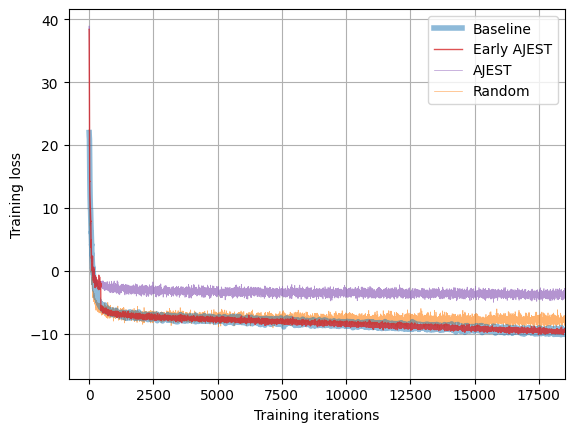

In [ ]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Training iterations")
plt.ylabel("Training loss")
plt.xlim([-800, 18500])
plt.grid()

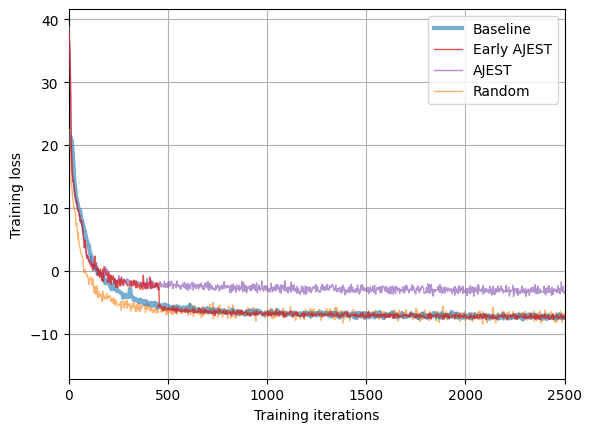

In [ ]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs_zoom[s])
plt.legend()
plt.xlabel("Training iterations")
plt.ylabel("Training loss")
plt.xlim([0, 2500])
plt.grid()

# W&B Validation Classification Plots' Data

## Parameters

In [ ]:
filename = "Val_Top1_0.10_vs_Epoch.csv"
ema = 0.1
metric = "top1"

## Top-1 [EMA=0.10]

### Load data into Pandas

Unfortunetely, all my validation curves are with EMA=0.1, even the one with guidance=1.7, regardless of what they say in W&B

In [ ]:
pandas_data = pd.read_csv(os.path.join(dir_results, filename))

In [7]:
pandas_data

,Validation Epoch,Group: 06_CorrectEMA_AJEST_00 - _step,Group: 06_CorrectEMA_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_AJEST_00 - _step__MAX,Group: 06_CorrectEMA_AJEST_00 - Validation Swin-L Top-1 Accuracy [EMA=0.100],Group: 06_CorrectEMA_AJEST_00 - Validation Swin-L Top-1 Accuracy [EMA=0.100]__MIN,Group: 06_CorrectEMA_AJEST_00 - Validation Swin-L Top-1 Accuracy [EMA=0.100]__MAX,Group: 06_CorrectEMA_Early_AJEST_00 - _step,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MIN,Group: 06_CorrectEMA_Early_AJEST_00 - _step__MAX,...,Group: 06_CorrectEMA_Random_00 - _step__MAX,Group: 06_CorrectEMA_Random_00 - Validation Swin-L Top-1 Accuracy [EMA=0.100],Group: 06_CorrectEMA_Random_00 - Validation Swin-L Top-1 Accuracy [EMA=0.100]__MIN,Group: 06_CorrectEMA_Random_00 - Validation Swin-L Top-1 Accuracy [EMA=0.100]__MAX,Group: 04_Tiny_LR_Baseline_04 - _step,Group: 04_Tiny_LR_Baseline_04 - _step__MIN,Group: 04_Tiny_LR_Baseline_04 - _step__MAX,Group: 04_Tiny_LR_Baseline_04 - Validation Swin-L Top-1 Accuracy [EMA=0.100],Group: 04_Tiny_LR_Baseline_04 - Validation Swin-L Top-1 Accuracy [EMA=0.100]__MIN,Group: 04_Tiny_LR_Baseline_04 - Validation Swin-L Top-1 Accuracy [EMA=0.100]__MAX
0,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,741597.0,0.006836,0.006836,0.006836,NaN,NaN,NaN,NaN,NaN,NaN
1,250,168036.0,168036.0,168036.0,0.0095,0.0095,0.0095,192936.0,192936.0,192936.0,...,741598.0,0.010254,0.010254,0.010254,NaN,NaN,NaN,NaN,NaN,NaN
2,375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,741599.0,0.007812,0.007812,0.007812,NaN,NaN,NaN,NaN,NaN,NaN
3,500,168037.0,168037.0,168037.0,0.0130,0.0130,0.0130,192937.0,192937.0,192937.0,...,741600.0,0.009766,0.009766,0.009766,744289.0,744289.0,744289.0,0.00800,0.0080,0.0080
4,625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,741601.0,0.014160,0.014160,0.014160,NaN,NaN,NaN,NaN,NaN,NaN
5,750,168038.0,168038.0,168038.0,0.0160,0.0160,0.0160,192938.0,192938.0,192938.0,...,741607.0,0.013500,0.013500,0.013500,744290.0,744290.0,744290.0,0.01850,0.0185,0.0185
6,1000,168039.0,168039.0,168039.0,0.0215,0.0215,0.0215,192939.0,192939.0,192939.0,...,741608.0,0.021500,0.021500,0.021500,NaN,NaN,NaN,NaN,NaN,NaN
7,3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,744319.0,744319.0,744319.0,0.27700,0.2770,0.2770
8,4000,NaN,NaN,NaN,NaN,NaN,NaN,244002.5,244002.0,244003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5000,239395.0,239395.0,239395.0,0.1450,0.1450,0.1450,421397.0,421397.0,421397.0,...,741628.0,0.141500,0.141500,0.141500,744335.0,744333.0,744337.0,0.45900,0.3985,0.5195


### Preprocess with Pandas

In [13]:
for c in pandas_data.columns:
    condition = any([st in c for st in ["MIN", "MAX", "step"]])
    if condition: del pandas_data[c]

In [ ]:
pandas_data = pandas_data.rename(columns={f"Group: 06_CorrectEMA_AJEST_00 - Validation {metrics_names[metric]} [EMA={ema:.03f}]":"AJEST",
                                          f"Group: 06_CorrectEMA_Early_AJEST_00 - Validation {metrics_names[metric]} [EMA={ema:.03f}]":"Early AJEST",
                                          f"Group: 06_CorrectEMA_Random_00 - Validation {metrics_names[metric]} [EMA={ema:.03f}]":"Random",
                                          f"Group: 04_Tiny_LR_Baseline_04 - Validation {metrics_names[metric]} [EMA={ema:.03f}]":"Baseline",
                                          f"Group: 04_Tiny_LR_Ref_00 - Validation {metrics_names[metric]} [EMA={ema:.03f}]":"Reference",
                                          "Validation Epoch":"Epoch"})

In [19]:
pandas_data

,Epoch,AJEST,Early AJEST,Random,Baseline
0,125,NaN,NaN,0.006836,NaN
1,250,0.0095,0.00850,0.010254,NaN
2,375,NaN,NaN,0.007812,NaN
3,500,0.0130,0.01750,0.009766,0.00800
4,625,NaN,NaN,0.014160,NaN
5,750,0.0160,0.02700,0.013500,0.01850
6,1000,0.0215,0.03900,0.021500,NaN
7,3500,NaN,NaN,NaN,0.27700
8,4000,NaN,0.31400,NaN,NaN
9,5000,0.1450,0.38450,0.141500,0.45900


### Get data in Numpy

In [36]:
results_val[metric][f"ema={ema:.03f}"] = {}
res = results_val[metric][f"ema={ema:.03f}"]

for s in series:
    res[s] = {}
    res[s]["epoch"], res[s][metric] = pandas_data[["Epoch",s]][pd.notna(pandas_data[s])].to_numpy().T

### Plot

KeyError: 'Baseline'

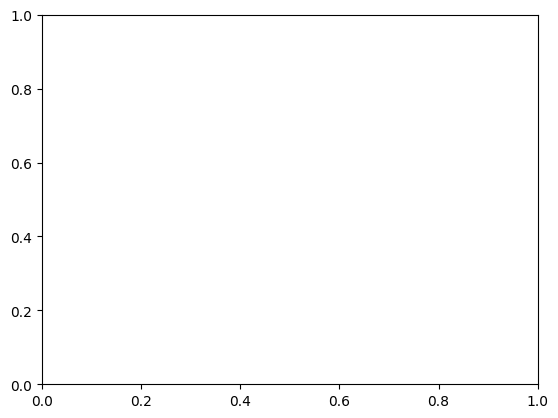

In [43]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(res[s]["epoch"], res[s][metric], label=s, **plt_kwargs_val[s])
plt.legend()
plt.xlabel("Training iterations")
plt.ylabel("Training loss")
# plt.xlim([-800, 18500])
plt.grid()

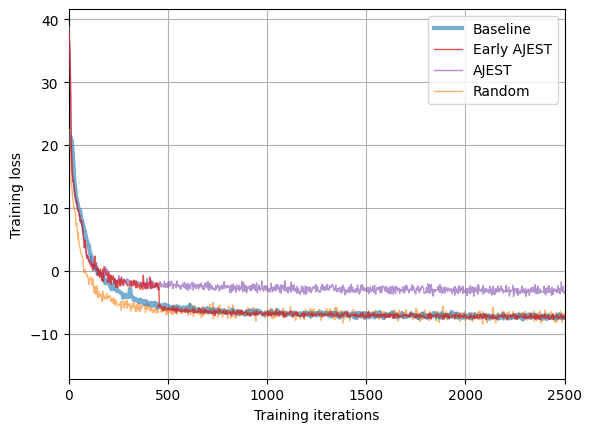

In [ ]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs_zoom[s])
plt.legend()
plt.xlabel("Training iterations")
plt.ylabel("Training loss")
plt.xlim([0, 2500])
plt.grid()